# Modeling the Decay of Cesium-137 Produced by Isar-2

Isar 2, a nuclear power plant located in Bavaria, Germany, operated from 1988 until its shutdown in 2023. Situated on the banks of the Isar River, a tributary of the Danube, the plant faced controversy due to concerns over potential radioactive contamination of the river water. This issue was one of the factors in the German government’s nuclear phase-out plan, ultimately leading to Isar 2’s closure as the last operational nuclear power plant in the country.

In this project, we will examine Cesium-137, one of the most hazardous radioactive isotopes, a by-product of nuclear power plants using uranium as fuel, like Isar 2. We will model its decay to evaluate the environmental impact of the Isar 2 nuclear power plant and assess the potential risks associated with the release of this radioactive isotope into the surrounding ecosystem.

## SETUP

In [59]:
# importing libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#### **Time Range ($t_0, t_{final})$**

We are gonna analyze the decay from a certain root time, so let's set $t_0 = 0$. Now the question is until what time we should analyze the decay. The half-life of Cesium-137 is about 30 years[^1], so we should set our timeframe for at least 30 years, but for us to be able to draw some conclusion about the actual impact of the Isar-2 nuclear power plant, we should analyze the decay for a longer period. Let's set $t_{final} = 100$, to see how Cesium-137 decays over a century[^2].

[^1]: [Cesium-137's Half-Life](https://en.wikipedia.org/wiki/Caesium-137)
[^2]: Note: It would be a better approach to analyze the decay, until a certain state instead of time, for example, when it reaches a quantity that is scientifically considered safe. But for the sake of this project, we are interested in the decay's behavior, so we will analyze it over a century.

In [60]:
# setting time range
t_initial = 0
t_final = 100

#### **Initial Value of Cesium-137**

Cesium-137 is generated primarily from the fission of uranium and plutonium isotopes within nuclear reactors. For typical commercial nuclear reactors like Isar 2, it is estimated that approximately 0.1 to 0.3 grams of Cesium-137 are produced per gigawatt-day (GWd) of electricity generated [^3].

[^3]: [Nuclear Fission Products](https://world-nuclear.org/information-library/nuclear-fuel-cycle/introduction/nuclear-fuel-cycle-overview)

The Isar 2 plant has a net electrical output of about 1400 megawatts (MW)[^4]. Over an 18-month cycle, which can be estimated to produce around 10-11 terawatt-hours (TWh) of electricity, the total energy output can be converted into gigawatt-days. 

$$ 
1400 \text{ MW} \times 18 \text{ months} \times (\frac{30 \text{ days}}{1 \text{ month}} \times \frac{24 \text{ hours}}{1 \text{ day}} \times \frac{1 \text{ GW}}{1000 \text{ MW}}) \approx 8000 \text{ GWd}
$$

This calculation shows that Isar 2 would generate approximately 8000 GWd of electricity during this period. 

$$
8000 \text{ GWd} \times \frac{0.1 \text{ grams}}{1 \text{ GWd}} \leq N_0 \text{ grams} \leq 8000 \text{ GWd} \times \frac{0.3 \text{ grams}}{1 \text{ GWd}}
$$

We need a single value for the initial quantity of Cesium-137, so although not the most accurate, but a reasonable estimate would be the average of the lower and upper bounds:

$$
8000 \text{ GWd} \times \frac{0.2 \text{ grams}}{1 \text{ GWd}} \approx 1600 \text{ grams}
$$

Considering operational practices, regulatory limits, and containment strategies, it is logical to conclude that a realistic initial quantity of Cesium-137, prior to decay, would be around **1600 grams**[^5].

[^4]: [Isar 2 Nuclear Power Plant Facts](https://www.nuklearesicherheit.de/kerntechnische-anlagen/deutschlandkarte/-kkw-in-deutschland/isar-2/)
[^5]: Note: The actual initial quantity of Cesium-137 through a cycle in Isar 2 would rely on the specific amount of fuel (MOX and Uranium) used, the effieciency of the reactor, and the operational practices of the plant, etc which are not publicly available. The value of 1600 grams however, is a reasonable estimate for the scope of this project.

In [61]:
# initial value of N at t = 0
N_0 = 1600

#### **Decay Rate of Cesium-137**

The decay of Cesium-137 follows an exponential decay model, where the number of radioactive nuclei decreases over time. The decay constant[^6] is calculated by:

$$ \lambda = \frac{\ln(2)}{t_{1/2}} $$

[^6]: [Radioactive Decay Constant](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/10%3A__Nuclear_Physics/10.04%3A_Radioactive_Decay)

The half-life of Cesium-137 is approximately 30 years, which corresponds to a decay constant of:

$$ \lambda = \frac{\ln(2)}{30} \approx 0.0231 \text{ years}^{-1} $$

Of course the quantity of Cesium-137 will reduce over time, so our "growth rate" will be negative, which could be represented as:

$$ -\lambda = -\frac{\ln(2)}{30} \rightarrow r = \frac{\ln(2)}{30} \times -1$$

In [62]:
# decay constant for half-life of 30
decay_constant = (math.log(2) / 30) * (-1)

## INITIAL VALUE PROBLEM (IVP)

Putting everything together, we get a differential equation that models the decay of Cesium-137:

$$ \frac{dN}{dt} = -\lambda N, \space N(0) = N_0 $$

In [63]:
# function to calculate the decay differential (IVP)
def IVP(t:float, N: float) -> float:
    return decay_constant * N

We can of course solve this equation for $N(t)$, just to compare the results with an exact solution:

$$ \frac{dN}{dt} = -\lambda N \rightarrow \frac{dN}{N} = -\lambda dt \\[8pt] 
\rightarrow  \int \frac{dN}{N} = \int -\lambda dt \\[8pt] 
\rightarrow \ln|N| = -\lambda t + C \\[8pt]
\rightarrow N = e^{-\lambda t + C} \\[8pt]
\rightarrow N = e^C e^{-\lambda t} \\[8pt]
\rightarrow N = Ce^{-\lambda t}$$

But for $t = 0$, we have $N(0) = Ce^{-\lambda \cdot 0} = C$, so $C = N_0$. Therefore, the solution to the differential equation is:

$$ N(t) = N_0 e^{-\lambda t} $$

In [64]:
# function to calculate the exact solution
def exactSolution(t: float) -> float:
    return N_0 * math.exp(decay_constant * t)

Now, let's solve this differential equation using the **Euler Method** and compare the results with the exact solution.

## EULER METHOD

The Euler method is a simple numerical technique for solving ordinary differential equations. The formula for the Euler method is:

$$ N_{i+1} = N_i + hf(t_i, N_i) $$

where $N_i$ is the value of the function at time $t_i$, $N_{i+1}$ is the value of the function at time $t_{i+1} = t_i + h$, and $f(t_i, N_i)$ is the derivative of the function at time $t_i$. The parameter $h$ is the step size, which determines the size of the time intervals between successive points in the numerical solution.

To implement the Euler method, I used a `eulerStep` function that returns $N_{i+1}$ given $N_i$ through $N_0$ and $t$, $h$, and the differential equation function or the `IVP`. I would then use the `eulerMethod` function to iterate over the time range (given by `t_initial` and `t_final`) and calculate the values of $N(t)$. I stored the N values and Time points in different lists for later use.

In [65]:
# Calculating the next value of N using the Euler method
def eulerStep(f:callable, t:float, y:float, h:float) -> float:
    return y + h * f(t, y)

# Returning the list of N values using the Euler method
def eulerMethod(f:callable, N_0:float, t_initial:float, t_final:float, h:float) -> tuple[list[float], list[float]]:
    n = int((t_final - t_initial) / h)
    
    # Initializing arrays for time and y values
    t_values = np.linspace(t_initial, t_final, n + 1)
    N_values = np.zeros(n + 1)
    N_values[0] = N_0
    
    # Iterating over the time array
    for i in range(n):
        N_values[i + 1] = eulerStep(f, t_values[i], N_values[i], h)
        
    return t_values, N_values

For the sake of comparison, I'll implement the Euler method in 5 different step sizes: $h_1 = 25, \space h_2 = 20, \space h_3 = 10, \space h_4 = 1, \space h_5 = 0.1$

In [66]:
# Step sizes
h1 = 25
h2 = 20
h3 = 10
h4 = 1
h5 = 0.1

# Calling the Euler method
t_h1_euler, N_h1_euler = eulerMethod(IVP, N_0, t_initial, t_final, h1)
t_h2_euler, N_h2_euler = eulerMethod(IVP, N_0, t_initial, t_final, h2)
t_h3_euler, N_h3_euler = eulerMethod(IVP, N_0, t_initial, t_final, h3)
t_h4_euler, N_h4_euler = eulerMethod(IVP, N_0, t_initial, t_final, h4)
t_h5_euler, N_h5_euler = eulerMethod(IVP, N_0, t_initial, t_final, h5)

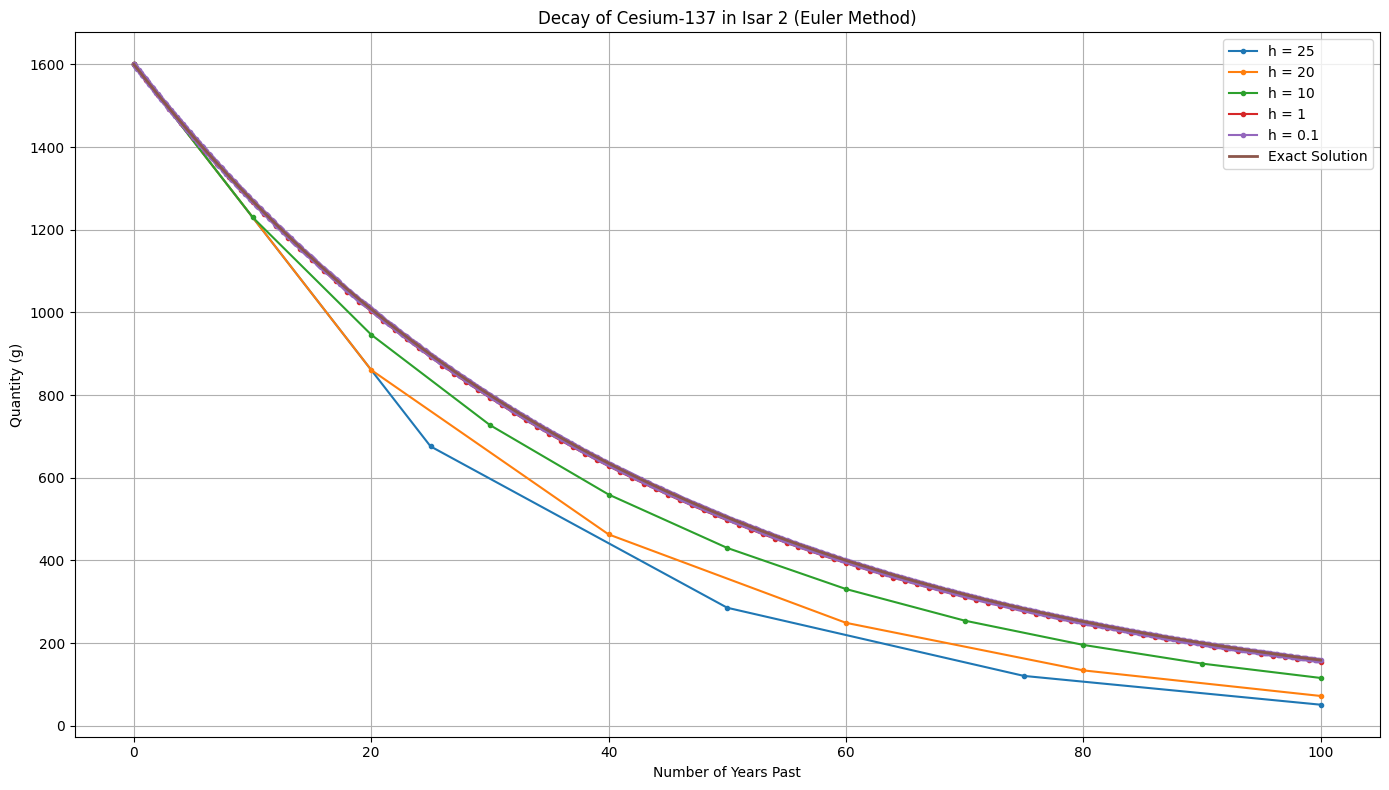

Exact solution: 158.74 grams

Step size of 25:
At year 0.00: 1600.00g left
At year 25.00: 675.80g left
At year 50.00: 285.44g left
At year 75.00: 120.57g left
At year 100.00: 50.92g left

Step size of 0.1:
At year 0.00: 1600.00g left
At year 0.10: 1596.30g left
At year 0.20: 1592.61g left
At year 0.30: 1588.94g left
At year 0.40: 1585.26g left
At year 0.50: 1581.60g left
At year 0.60: 1577.95g left
At year 0.70: 1574.30g left
At year 0.80: 1570.66g left
At year 0.90: 1567.03g left
At year 1.00: 1563.41g left
At year 1.10: 1559.80g left
At year 1.20: 1556.20g left
At year 1.30: 1552.60g left
At year 1.40: 1549.02g left
At year 1.50: 1545.44g left
At year 1.60: 1541.87g left
At year 1.70: 1538.30g left
At year 1.80: 1534.75g left
At year 1.90: 1531.20g left
At year 2.00: 1527.66g left
At year 2.10: 1524.14g left
At year 2.20: 1520.61g left
At year 2.30: 1517.10g left
At year 2.40: 1513.60g left
At year 2.50: 1510.10g left
At year 2.60: 1506.61g left
At year 2.70: 1503.13g left
At year 2.

In [67]:
# Figure size
plt.figure(figsize = (14, 8))

# Plotting the Euler Approximation
plt.plot(t_h1_euler, N_h1_euler, '.-', label = 'h = 25')
plt.plot(t_h2_euler, N_h2_euler, '.-', label = 'h = 20')
plt.plot(t_h3_euler, N_h3_euler, '.-', label = 'h = 10')
plt.plot(t_h4_euler, N_h4_euler, '.-', label = 'h = 1')
plt.plot(t_h5_euler, N_h5_euler, '.-', label = 'h = 0.1')

# Plotting the Exact Solution
t_values = np.linspace(t_initial, t_final, 100)
N_values = [exactSolution(t) for t in t_values]
plt.plot(t_values, N_values, label = 'Exact Solution', linewidth = 2)

# Labeling
plt.title('Decay of Cesium-137 in Isar 2 (Euler Method)')
plt.xlabel('Number of Years Past')
plt.ylabel('Quantity (g)')
plt.legend()

# Displaying
plt.tight_layout()
plt.grid()
plt.show()

# Displaying some of the results numerically
print("Exact solution:", round(exactSolution(100),2), "grams\n")

print("Step size of 25:")
for t, y in zip(t_h1_euler, N_h1_euler):
    print(f"At year {t:.2f}: {y:.2f}g left")

print("\nStep size of 0.1:")
for t, y in zip(t_h5_euler, N_h5_euler):
    print(f"At year {t:.2f}: {y:.2f}g left")

Using the Euler method, with a step size of 0.1, we estimated that after a century about 158.32 grams of Cesium-137 would remain, which is about 10% of the initial quantity. This result is consistent with the exact solution, which predicts that 10% of the initial quantity would remain after 30 years. This demonstrates the effectiveness of the Euler method in modeling the decay of Cesium-137, however, there is a slight difference between the exact solution and the Euler method. More importantly, when the step size is large, the results are unacceptable. This means that the Euler method's accuracy is only good, when a very small step size is used, which is computationally expensive and may not be practical for large-scale problems.

Let's use the **Runge-Kutta method** to solve the same problem and see if we can get a more accurate result.

## RK4 METHOD

The Runge-Kutta method is a more accurate numerical technique for solving ordinary differential equations. The fourth-order Runge-Kutta method (RK4) is a popular choice for its balance between accuracy and computational efficiency. The formula for the RK4 method is:

$$ k_1 = hf(t_i, N_i) \\[8pt]
k_2 = hf(t_i + \frac{h}{2}, N_i + \frac{k_1}{2}) \\[8pt]
k_3 = hf(t_i + \frac{h}{2}, N_i + \frac{k_2}{2}) \\[8pt]
k_4 = hf(t_i + h, N_i + k_3) \\[8pt]
N_{i+1} = N_i + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6}$$

where $k_1, k_2, k_3, k_4$ are intermediate values used to calculate the next value of $N_i$, which is $N_{i+1}$.

To implement the RK4 method, I used the same methodology as the Euler method, but with the RK4 formula, initializing $k_1, k_2, k_3, k_4$ and calculating the next value of the function $N_{i+1}$. Then, the `rk4Method` function iterates over the time range and calculates the values of $N(t)$ for the given step sizes, just like the Euler method.

In [68]:
# Calculating the next value of N (N_{i+1}) using the RK4 method
def rk4Step(f:callable, t:float, y:float, h:float) -> float:
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)

    return y + (((k1) + (2 * k2) + (2 * k3) + (k4)) / 6)

# Returning the list of N values using the RK4 method
def rk4Method(f:callable, N_0:float, t_initial:float, t_final:float, h:float) -> tuple[list[float], list[float]]:
    n = int((t_final - t_initial) / h)
    
    # Initializing arrays for time and y values
    t_values = np.linspace(t_initial, t_final, n + 1)
    N_values = np.zeros(n + 1)
    N_values[0] = N_0
    
    # Iterating over the time array
    for i in range(n):
        N_values[i + 1] = rk4Step(f, t_values[i], N_values[i], h)
        
    return t_values, N_values

Let's use the same step sizes as the Euler method to implement the RK4 method and compare the results.

In [69]:
# Calling the RK4 method
t_h1_rk4, N_h1_rk4 = rk4Method(IVP, N_0, t_initial, t_final, h1)
t_h2_rk4, N_h2_rk4 = rk4Method(IVP, N_0, t_initial, t_final, h2)
t_h3_rk4, N_h3_rk4 = rk4Method(IVP, N_0, t_initial, t_final, h3)
t_h4_rk4, N_h4_rk4 = rk4Method(IVP, N_0, t_initial, t_final, h4)
t_h5_rk4, N_h5_rk4 = rk4Method(IVP, N_0, t_initial, t_final, h5)

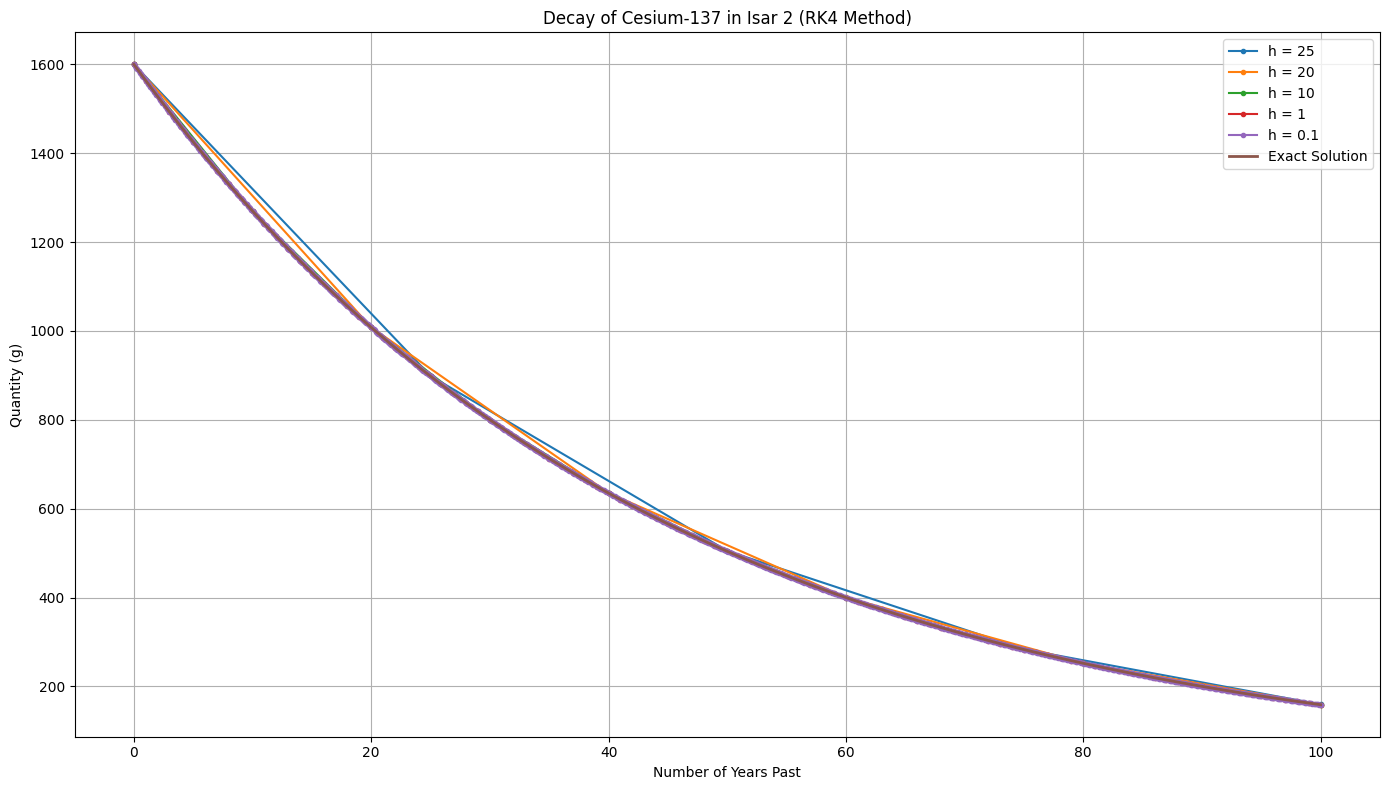

Exact solution: 158.74 grams

Step size of 25:
At year 0.00: 1600.00g left
At year 25.00: 898.75g left
At year 50.00: 504.85g left
At year 75.00: 283.58g left
At year 100.00: 159.29g left

Step size of 0.1:
At year 0.00: 1600.00g left
At year 0.10: 1596.31g left
At year 0.20: 1592.62g left
At year 0.30: 1588.95g left
At year 0.40: 1585.28g left
At year 0.50: 1581.62g left
At year 0.60: 1577.97g left
At year 0.70: 1574.33g left
At year 0.80: 1570.70g left
At year 0.90: 1567.07g left
At year 1.00: 1563.46g left
At year 1.10: 1559.85g left
At year 1.20: 1556.25g left
At year 1.30: 1552.66g left
At year 1.40: 1549.07g left
At year 1.50: 1545.50g left
At year 1.60: 1541.93g left
At year 1.70: 1538.37g left
At year 1.80: 1534.82g left
At year 1.90: 1531.28g left
At year 2.00: 1527.75g left
At year 2.10: 1524.22g left
At year 2.20: 1520.70g left
At year 2.30: 1517.19g left
At year 2.40: 1513.69g left
At year 2.50: 1510.20g left
At year 2.60: 1506.71g left
At year 2.70: 1503.24g left
At year 2

In [70]:
# Figure size
plt.figure(figsize = (14, 8))

# Plotting the RK4 Approximation
plt.plot(t_h1_rk4, N_h1_rk4, '.-', label = 'h = 25')
plt.plot(t_h2_rk4, N_h2_rk4, '.-', label = 'h = 20')
plt.plot(t_h3_rk4, N_h3_rk4, '.-', label = 'h = 10')
plt.plot(t_h4_rk4, N_h4_rk4, '.-', label = 'h = 1')
plt.plot(t_h5_rk4, N_h5_rk4, '.-', label = 'h = 0.1')

# Plotting the Exact Solution
t_values = np.linspace(t_initial, t_final, 100)
N_values = [exactSolution(t) for t in t_values]
plt.plot(t_values, N_values, label = 'Exact Solution', linewidth = 2)

# Labeling
plt.title('Decay of Cesium-137 in Isar 2 (RK4 Method)')
plt.xlabel('Number of Years Past')
plt.ylabel('Quantity (g)')
plt.legend()

# Displaying
plt.tight_layout()
plt.grid()
plt.show()

# Displaying some of the results numerically
print("Exact solution:", round(exactSolution(100),2), "grams\n")

print("Step size of 25:")
for t, y in zip(t_h1_rk4, N_h1_rk4):
    print(f"At year {t:.2f}: {y:.2f}g left")

print("\nStep size of 0.1:")
for t, y in zip(t_h5_rk4, N_h5_rk4):
    print(f"At year {t:.2f}: {y:.2f}g left")

Much better! We can clearly see how the RK4 method is not super reliant on the step size, as the Euler method is. It is also very accurate, with the result being almost exactly the same as the exact solution. While the result of the Euler method with a large step size such as 25 was not acceptable at all, the RK4 method with the same step size, still provided a very good estimate. 

Let's compare the two methods in terms of their errors and accuracy to see exactly how they behave.

## RK4 VS EULER

#### **Error's Behavior In Respect to Step Size**

Let's evaluate the error behavior of the methods in respect to the step size, by calculating the error for each step size and plotting it.

In [71]:
# Calculating the error for both methods
error25_euler = [exactSolution(t) - N_h1_euler[i] for i, t in enumerate(t_h1_euler)]
print("Euler error at h = 25:", round(exactSolution(100) - N_h1_euler[-1], 2), "grams")
error25_rk4 = [exactSolution(t) - N_h1_rk4[i] for i, t in enumerate(t_h1_rk4)]
print("RK4 error at h = 25:", round(exactSolution(100) - N_h1_rk4[-1], 2), "grams\n")

error20_euler = [exactSolution(t) - N_h2_euler[i] for i, t in enumerate(t_h2_euler)]
print("Euler error at h = 20:", round(exactSolution(100) - N_h2_euler[-1], 2), "grams")
error20_rk4 = [exactSolution(t) - N_h2_rk4[i] for i, t in enumerate(t_h2_rk4)]
print("RK4 error at h = 20:", round(exactSolution(100) - N_h2_rk4[-1], 2), "grams\n")

error10_euler = [exactSolution(t) - N_h3_euler[i] for i, t in enumerate(t_h3_euler)]
print("Euler error at h = 10:", round(exactSolution(100) - N_h3_euler[-1], 2), "grams")
error10_rk4 = [exactSolution(t) - N_h3_rk4[i] for i, t in enumerate(t_h3_rk4)]
print("RK4 error at h = 10:", round(exactSolution(100) - N_h3_rk4[-1], 2), "grams\n")

error1_euler = [exactSolution(t) - N_h4_euler[i] for i, t in enumerate(t_h4_euler)]
print("Euler error at h = 1:", round(exactSolution(100) - N_h4_euler[-1], 2), "grams")
error1_rk4 = [exactSolution(t) - N_h4_rk4[i] for i, t in enumerate(t_h4_rk4)]
print("RK4 error at h = 1:", round(exactSolution(100) - N_h4_rk4[-1], 2), "grams\n")

error01_euler = [exactSolution(t) - N_h5_euler[i] for i, t in enumerate(t_h5_euler)]
print("Euler error at h = 0.1:", round(exactSolution(100) - N_h5_euler[-1], 2), "grams")
error01_rk4 = [exactSolution(t) - N_h5_rk4[i] for i, t in enumerate(t_h5_rk4)]
print("RK4 error at h = 0.1:", round(exactSolution(100) - N_h5_rk4[-1], 2), "grams")

Euler error at h = 25: 107.82 grams
RK4 error at h = 25: -0.55 grams

Euler error at h = 20: 86.69 grams
RK4 error at h = 20: -0.21 grams

Euler error at h = 10: 43.1 grams
RK4 error at h = 10: -0.01 grams

Euler error at h = 1: 4.25 grams
RK4 error at h = 1: -0.0 grams

Euler error at h = 0.1: 0.42 grams
RK4 error at h = 0.1: -0.0 grams


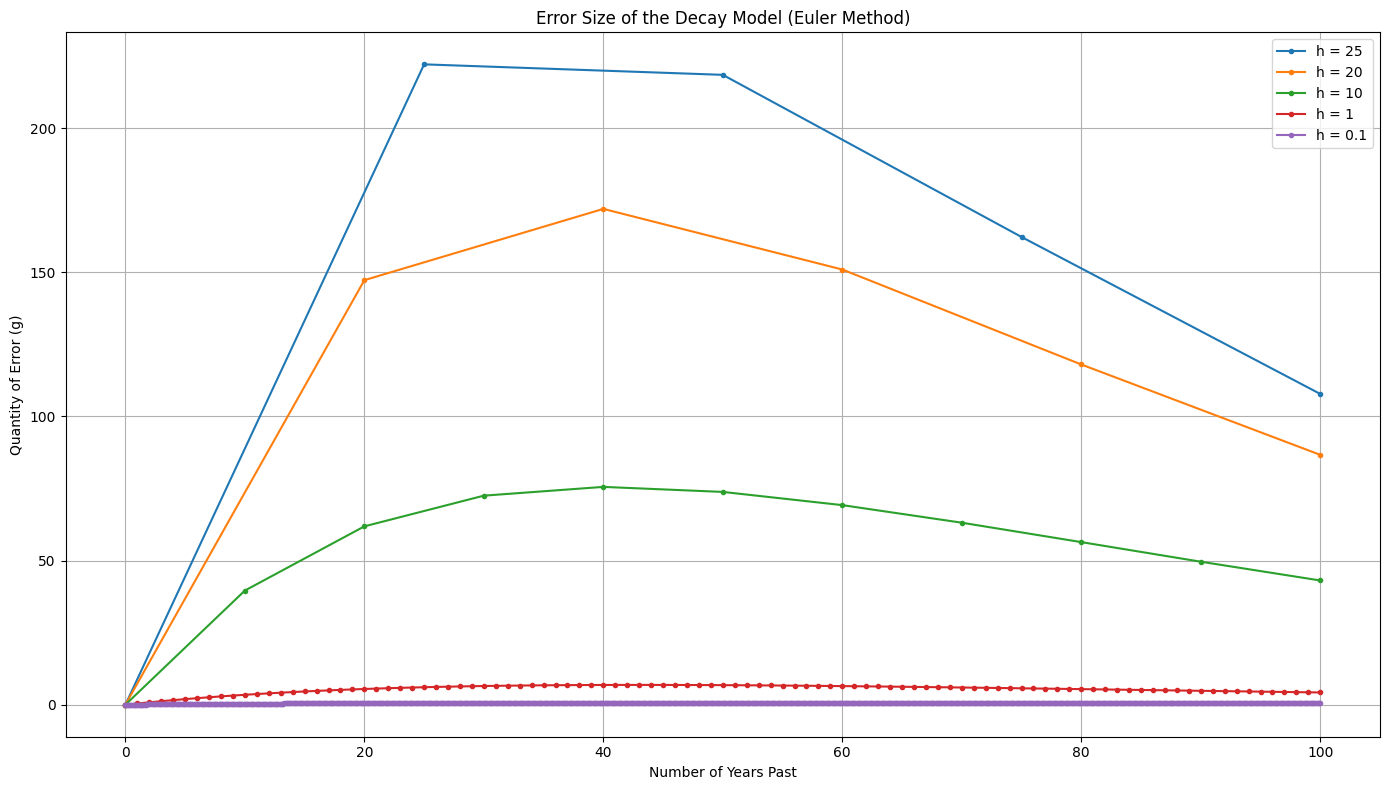

In [72]:
# Displaying the error plot for Euler
plt.figure(figsize = (14, 8))

# Plotting the Errors
plt.plot(t_h1_euler, error25_euler, '.-', label = 'h = 25')
plt.plot(t_h2_euler, error20_euler, '.-', label = 'h = 20')
plt.plot(t_h3_euler, error10_euler, '.-', label = 'h = 10')
plt.plot(t_h4_euler, error1_euler, '.-', label = 'h = 1')
plt.plot(t_h5_euler, error01_euler, '.-', label = 'h = 0.1')

# Labeling
plt.title('Error Size of the Decay Model (Euler Method)')
plt.xlabel('Number of Years Past')
plt.ylabel('Quantity of Error (g)')
plt.legend()

# Displaying
plt.tight_layout()
plt.grid()
plt.show()

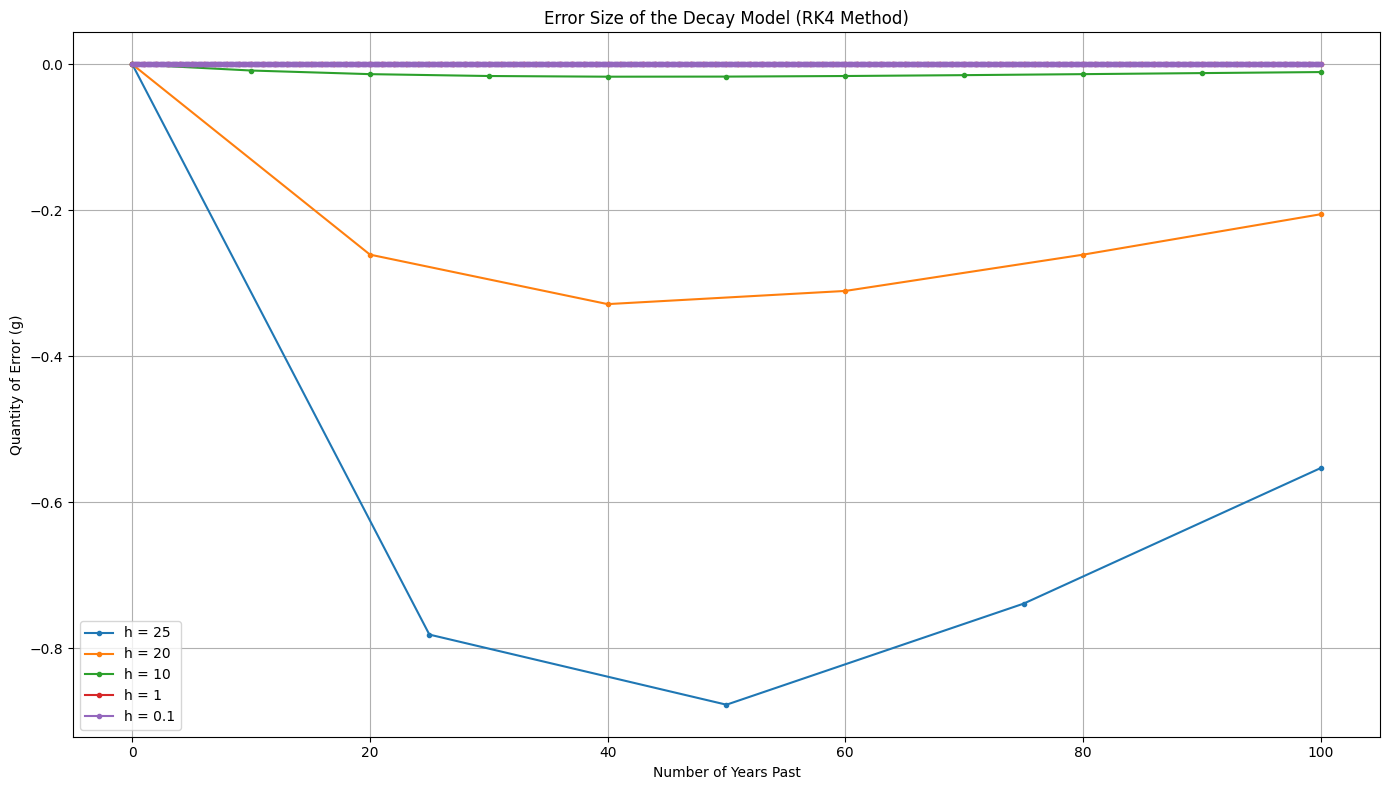

In [73]:
# Displaying the error plot for RK4
plt.figure(figsize = (14, 8))

# Plotting the Errors
plt.plot(t_h1_rk4, error25_rk4, '.-', label = 'h = 25')
plt.plot(t_h2_rk4, error20_rk4, '.-', label = 'h = 20')
plt.plot(t_h3_rk4, error10_rk4, '.-', label = 'h = 10')
plt.plot(t_h4_rk4, error1_rk4, '.-', label = 'h = 1')
plt.plot(t_h5_rk4, error01_rk4, '.-', label = 'h = 0.1')

# Labeling
plt.title('Error Size of the Decay Model (RK4 Method)')
plt.xlabel('Number of Years Past')
plt.ylabel('Quantity of Error (g)')
plt.legend()

# Displaying
plt.tight_layout()
plt.grid()
plt.show()

The graphs above, clearly show that as the step size increases, the error in the Euler method increases significantly, while the error in the RK4 method remains relatively constant. This can mean that the RK4 method can achieve an acceptable level of accuracy with a big step size, while the Euler method requires a very small step size to achieve the same level of accuracy. 

So although the RK4 method has more computational complexity because of the intermediate values, it can give a more accurate result with a larger step size, which is a significant advantage over the Euler method.

#### **Efficiency & Accuracy**

As we saw looking at the estimation results compared to the exact solution, the RK4 method is much more accurate than the Euler method. Because RK4 uses intermediate values to calculate the next value of the function, it is more accurate than the Euler method, which only uses the derivative at the current point to calculate the next value.

Although the computational cost of the RK4 method is higher than the Euler method, the RK4 method demands fewer iterations to achieve the same level of accuracy, so it is actually more computationally efficient in practice.

We can also look at the efficiency using the methods' Big-O. We known that the euler step error is about $\frac{M \times h^2}{2}$, so the Euler method has an error proportional to $O(h^2$), indicating that if the step size $h$ is halved, the error decreases by a factor of approximately four, reflecting its first-order accuracy. In contrast, the RK4 method boasts an error of $O(h^5)$, meaning that halving the step size reduces the error by a factor of about thirty-two, highlighting its fourth-order accuracy. This distinction implies that while the Euler method is simpler and faster to compute, the RK4 method is preferable for achieving greater precision with larger step sizes, making it more efficient for long-duration simulations. The choice between these methods ultimetly depends on the desired accuracy and computational resources available.

## REAL-WORLD APPLICATION

Nuclear physics represents one of humanity’s most significant advancements, offering the potential for clean, reliable, and sustainable energy to meet the increasing global energy demands. However, the risks associated with nuclear power are considerable. These risks extend beyond catastrophic accidents like Chernobyl and Fukushima; they also encompass the long-term environmental consequences of radioactive waste and contamination.

This project focused on modeling the decay of cesium-137, a common fission product found in nearly all nuclear reactors. Although Isar 2 operated under stringent regulations and safety protocols, the presence of cesium-137 in the environment—even after a century—underscores the challenges facing nuclear power. Current research indicates that a safe environmental level of cesium-137 is around 100 TBq[^7], which corresponds to approximately 30 grams of the isotope. In contrast, the estimated amount of cesium-137 remaining after 100 years in Isar 2 is about 159 grams, which translates to about 520 TBq, highlighting a significant concern. Furthermore we can potentialy use the ODE to estimate when the cesium-137 levels will reach the safe limit as well, or even the initital quantity of cesium-137 that would lead to the contamination of the Isar river.

Additionally, we can't ignore cases such as the devastating impact of the Chernobyl disaster either, which released an estimated 80,000 TBq of cesium-137 into the environment[^8], leading to long-term contamination and health risks for the affected populations. Although with today's regulations and safety measures, the risk of such a catastrophic event is significantly reduced, modeling the decay of fission products can help us understand the potential long-term consequences of nuclear power generation.

These findings emphasize the urgent need to prioritize nuclear safety and regulatory measures, and they prompt a reevaluation of the role of nuclear power in our energy landscape. Furthermore, they call for increased investment in research and development to advance nuclear technology, making it safer and more sustainable for future generations.

[^7]: [Cesium-137 in the Environment](https://www.tandfonline.com/doi/full/10.1080/00223131.2015.1018363#d1e147)
[^8]: [Cesium-137 in Chernobyl Disaster](https://radioactivity.eu.com/articles/nuclearenergy/chernobyl_caesium)


## SOURCES


1- [Cesium-137's Wikipedia](https://en.wikipedia.org/wiki/Caesium-137)

2- [Isar2 Plant Facts](https://www.nuklearesicherheit.de/kerntechnische-anlagen/deutschlandkarte/-kkw-in-deutschland/isar-2/)

3- [Nuclear Fission Products & Fuel Cycle Facts](https://world-nuclear.org/information-library/nuclear-fuel-cycle/introduction/nuclear-fuel-cycle-overview)

4- [Radioactive Decay Constant Formula](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/10%3A__Nuclear_Physics/10.04%3A_Radioactive_Decay)

5- [Cesium-137 in the Environment](https://www.tandfonline.com/doi/full/10.1080/00223131.2015.1018363#d1e147)

6- [Cesium-137 in Chernobyl Disaster](https://radioactivity.eu.com/articles/nuclearenergy/chernobyl_caesium)

7- The implementation code for RK4 and Euler methods are taken and slightly modified from course material.